In [1]:
from qiskit import execute
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

from shor import ShorAlgorithm

In [2]:
shor = ShorAlgorithm()

In [3]:
qc = shor.quantum_circuit(number=15, a=2, num_qubits_qft=2)

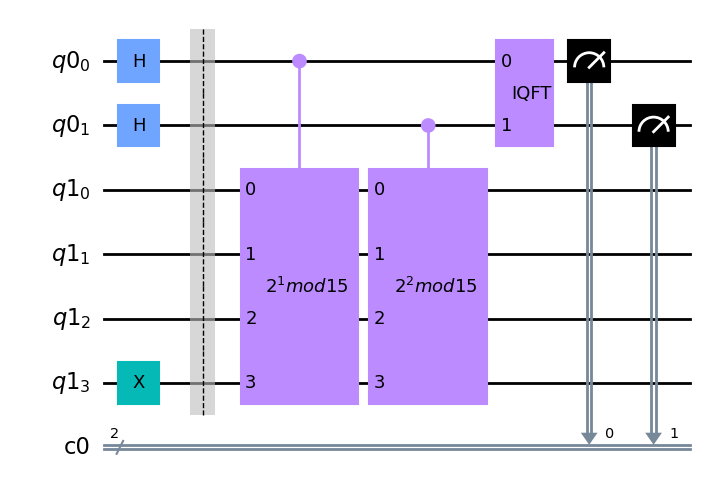

In [4]:
qc.draw(output="mpl")

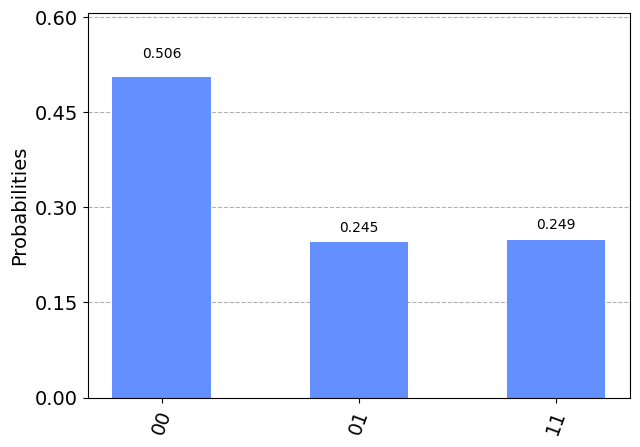

In [5]:
backend = Aer.get_backend("qasm_simulator")
counts = execute(qc, backend=backend, shots=8192).result().get_counts()
plot_histogram(counts)

In [6]:
df, factors = shor.get_number_prime_factors(number=15, counts=counts)

In [7]:
df

,register_output,phase,fraction,guess_for_r
0,01(bin) = 1(dec),0.25,1/4,4
1,11(bin) = 3(dec),0.75,3/4,4
2,00(bin) = 0(dec),0.00,0/1,1


In [8]:
factors

{3, 5}